<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Classification_ROW_FORM_BARE_YELLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
"""
    Import library
"""
##-- PyCaret
import yellowbrick
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/kdemertzis/Earthquakes/main/Data/Gradio/1_3class.csv'
# load the dataset
df = pd.read_csv(url)

In [8]:
df

,HI,PGA,VMAX,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,IA,HTOT,ECC,VW1,VW2,CLASS
0,-0.803896,-0.758406,-0.380754,-0.737851,-0.312416,-0.970743,-0.711210,-0.782988,-0.947641,-0.969282,-0.739065,-0.753560,-0.698515,-0.961077,-1,-1.000000,-1.000000,-1.000,Slight
1,-0.309010,-0.336455,-0.520283,-0.339836,-0.246178,-0.234555,-0.451885,-0.188916,-0.835959,-0.270579,-0.334136,-0.426614,-0.690956,-0.586540,-1,-1.000000,-1.000000,-1.000,Heavy
2,-0.678514,-0.886577,0.473018,-0.898363,0.742377,-1.000000,0.726856,-0.523535,-0.906362,-1.000000,-0.897628,-0.758617,-0.633500,-0.941164,-1,-1.000000,-1.000000,-1.000,Slight
3,-0.706459,-0.889756,0.376287,-0.874223,0.053097,-1.000000,0.622930,-0.684316,-0.938239,-1.000000,-0.874651,-0.779553,-0.821366,-0.958651,-1,-1.000000,-1.000000,-1.000,Slight
4,-0.094313,-0.508327,-0.049832,-0.498033,-0.490419,-0.476167,0.494934,-0.395148,-0.623396,-0.432149,-0.490870,-0.288733,-0.356432,-0.678604,-1,-1.000000,-1.000000,-1.000,Heavy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,-0.110676,-0.267125,-0.233359,-0.268970,-0.348285,-0.436148,-0.592923,-0.349476,-0.683823,-0.495106,-0.264305,-0.105248,-0.380026,-0.698649,1,0.771174,0.532468,0.675,Heavy
1946,-0.363570,-0.524076,-0.303090,-0.337552,-0.340879,-0.314236,-0.712563,-0.254226,-0.716467,-0.283775,-0.335066,-0.462043,-0.483230,-0.653656,1,0.771174,0.532468,0.675,Heavy
1947,-0.591280,-0.327603,-0.805140,-0.303134,-0.489413,-0.564878,-0.760432,-0.462095,-0.941956,-0.551974,-0.294792,-0.656499,-0.884645,-0.752731,1,0.771174,0.532468,0.675,Moderate
1948,-0.302428,-0.078795,-0.644079,0.165176,-0.702477,-0.625426,-0.662257,-0.233787,-0.772861,-0.377546,0.161163,-0.341664,-0.399075,-0.402338,1,0.771174,0.532468,0.675,Heavy


In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
X

,HI,PGA,VMAX,ASI,TSIGN,TBRAC,PP,CAV,SED,TUD,EPA,PGV,PGD,IA,HTOT,ECC,VW1,VW2
0,-0.803896,-0.758406,-0.380754,-0.737851,-0.312416,-0.970743,-0.711210,-0.782988,-0.947641,-0.969282,-0.739065,-0.753560,-0.698515,-0.961077,-1,-1.000000,-1.000000,-1.000
1,-0.309010,-0.336455,-0.520283,-0.339836,-0.246178,-0.234555,-0.451885,-0.188916,-0.835959,-0.270579,-0.334136,-0.426614,-0.690956,-0.586540,-1,-1.000000,-1.000000,-1.000
2,-0.678514,-0.886577,0.473018,-0.898363,0.742377,-1.000000,0.726856,-0.523535,-0.906362,-1.000000,-0.897628,-0.758617,-0.633500,-0.941164,-1,-1.000000,-1.000000,-1.000
3,-0.706459,-0.889756,0.376287,-0.874223,0.053097,-1.000000,0.622930,-0.684316,-0.938239,-1.000000,-0.874651,-0.779553,-0.821366,-0.958651,-1,-1.000000,-1.000000,-1.000
4,-0.094313,-0.508327,-0.049832,-0.498033,-0.490419,-0.476167,0.494934,-0.395148,-0.623396,-0.432149,-0.490870,-0.288733,-0.356432,-0.678604,-1,-1.000000,-1.000000,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,-0.110676,-0.267125,-0.233359,-0.268970,-0.348285,-0.436148,-0.592923,-0.349476,-0.683823,-0.495106,-0.264305,-0.105248,-0.380026,-0.698649,1,0.771174,0.532468,0.675
1946,-0.363570,-0.524076,-0.303090,-0.337552,-0.340879,-0.314236,-0.712563,-0.254226,-0.716467,-0.283775,-0.335066,-0.462043,-0.483230,-0.653656,1,0.771174,0.532468,0.675
1947,-0.591280,-0.327603,-0.805140,-0.303134,-0.489413,-0.564878,-0.760432,-0.462095,-0.941956,-0.551974,-0.294792,-0.656499,-0.884645,-0.752731,1,0.771174,0.532468,0.675
1948,-0.302428,-0.078795,-0.644079,0.165176,-0.702477,-0.625426,-0.662257,-0.233787,-0.772861,-0.377546,0.161163,-0.341664,-0.399075,-0.402338,1,0.771174,0.532468,0.675


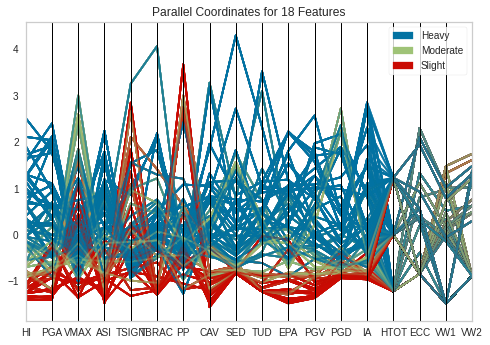

In [16]:
from sklearn.datasets import load_wine
from yellowbrick.features import parallel_coordinates

visualizer = parallel_coordinates(X, y, normalize="standard")

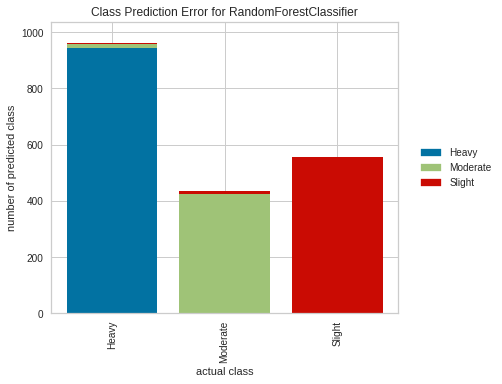

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import class_prediction_error

X = OneHotEncoder().fit_transform(X)
visualizer = class_prediction_error(
    RandomForestClassifier(n_estimators=10), X, y
)

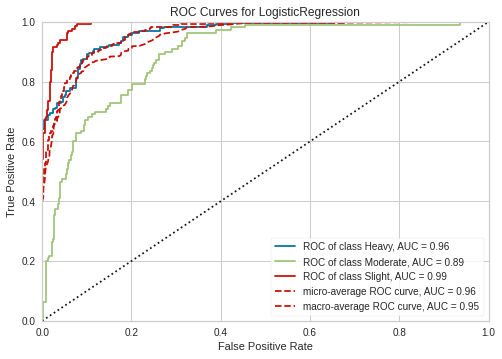

In [25]:
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

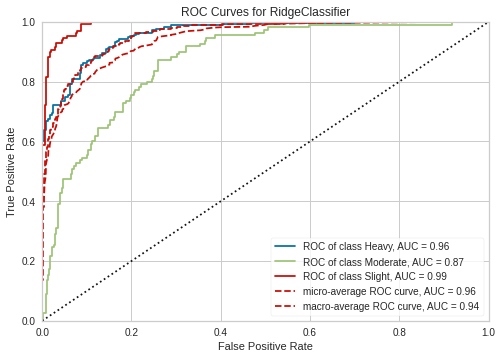

In [28]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instaniate the classification model and visualizer
model = RidgeClassifier()
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

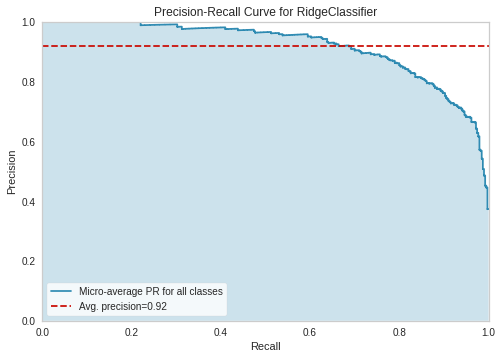

In [29]:
import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


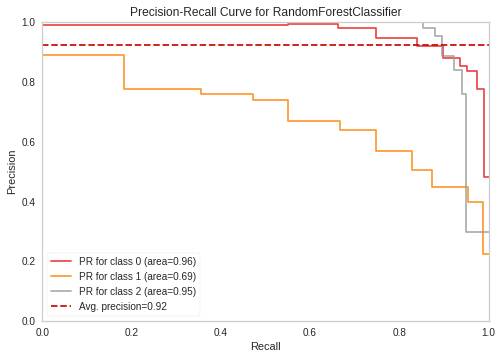

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

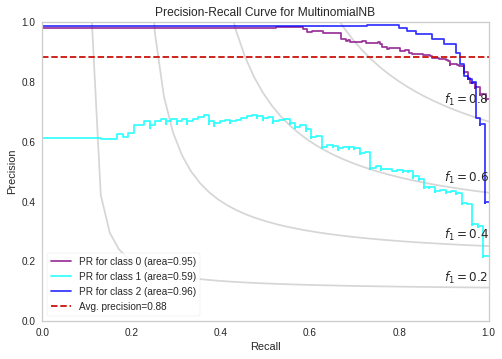

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    MultinomialNB(),
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

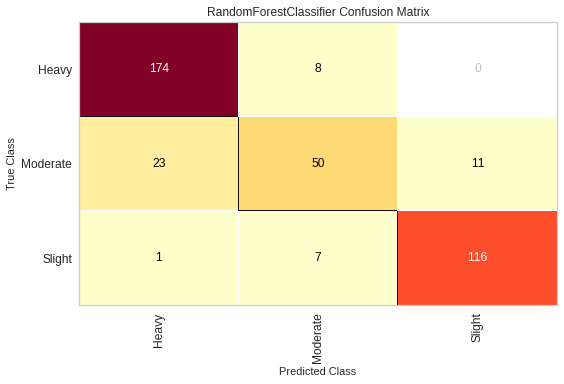

In [36]:
#First do our imports
import yellowbrick

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ConfusionMatrix

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=11)

model = RandomForestClassifier()

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

/usr/local/lib/python3.8/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/yellowbrick/classifier/classification_report.py:204: RuntimeWarning: invalid value encountered in true_divide
  scores[-1] = scores

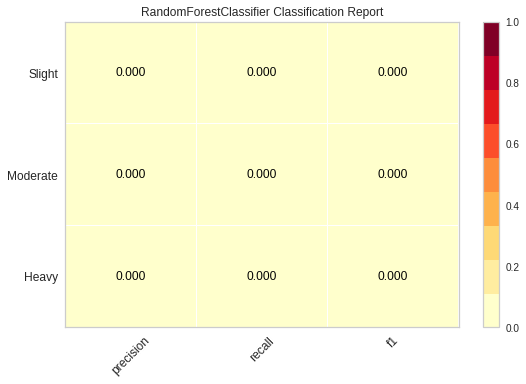

In [42]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
# Instantiate the classification model and visualizer
bayes = RandomForestClassifier()
visualizer = ClassificationReport(bayes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data